In [2]:
#q1
import loans
import search

fhb = loans.Bank("First Home Bank")
tree = search.BST()
avg_ir = 0
count = 0
for loan in fhb.loans:
    ir = loan.interest_rate
    tree.add(ir, loan)
    if ir >= 0:
        count += 1
        avg_ir += ir
        
avg_ir/count

2.962962962962963

In [3]:
#q2
avg_applcnts = 0
count = 0
for loan in fhb.loans:
    count += 1
    avg_applcnts += len(loan.applicants)

avg_applcnts/count

1.5777777777777777

In [4]:
#q3
out = dict()
for loan in fhb.loans:
    for applicant in loan.applicants:
        if out.get(applicant.age) == None:
            out[applicant.age] = 1
            continue
        out[applicant.age] += 1
out

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [5]:
#q4
len(tree[-1])

18

In [6]:
#q5
# maxLv : keeps track of maximum
# level : Level of root
def deepest(root, level, maxLv):
    if (root != None):
        level += 1
        deepest(root.left, level, maxLv)
 
        # Update level and rescue
        if (level > maxLv[0]):                     
            maxLv[0] = level
         
        deepest(root.right, level, maxLv)
        
        
# Initialize max level
maxLv = [-1]
 
# Updates value "res" and "maxLevel"
# Note that res and maxLen are passed
# by reference.
deepest(tree.root, 0, maxLv)
maxLv[0]

9

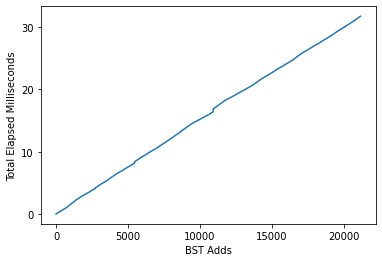

In [7]:
#q6
from time import time
import numpy as np
import matplotlib.pyplot as plt

uwcu = loans.Bank("University of Wisconsin Credit Union")
tree = search.BST()
times = dict()
count = 0

begin = time()
for loan in uwcu.loans:
    ir = loan.interest_rate
    tree.add(ir, loan)
    end = time()
    times[count] = end - begin
    count += 1
    
plt.plot(list(times.keys()), np.array(list(times.values())) * 1000)
plt.xlabel("BST Adds")
plt.ylabel("Total Elapsed Milliseconds")
plt.xticks([0, 5000, 10000, 15000, 20000])
plt.yticks([0, 10, 20, 30])
plt.show()

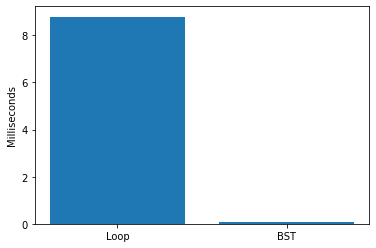

In [8]:
#q7
import pandas as pd

times = dict()

# time to find missing 'interest_rate' by looping
count = 0
begin = time()
for loan in uwcu.loans:
    if loan.interest_rate == -1:
        count += 1
end = time()
times["Loop"] = end - begin

# time to compute len(NAME_OF_YOUR_BANK_OBJECT[-1])
begin = time()
count = len(tree[-1])
end = time()
times["BST"] = end - begin

plt.bar(times.keys(), np.array(list(times.values())) * 1000)
plt.ylabel("Milliseconds")
plt.show()

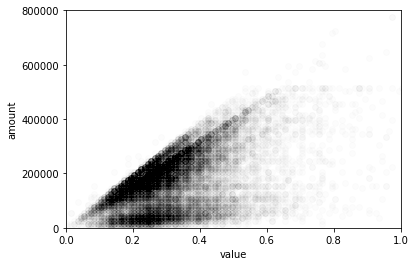

In [9]:
#q8
pv = []
la = []

for loan in uwcu.loans:
    if loan.property_value > 0:
        pv.append(loan.property_value)
        la.append(loan.loan_amount)

plt.scatter(np.array(pv) / 1000000, la, alpha=0.01, c='#000000')
plt.xlabel("value")
plt.ylabel("amount")
plt.xlim(0.0, 1.0)
plt.ylim(0, 800000)
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks([0, 200000, 400000, 600000, 800000])
plt.show()

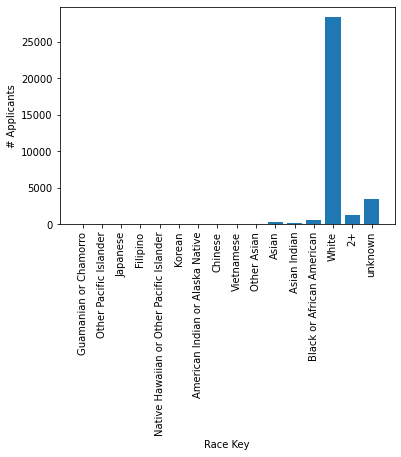

In [10]:
#q9
rd = {'2+': 0, 'unknown': 0}

for loan in uwcu.loans:
    for applicant in loan.applicants:
        r = len(applicant.race)
        if r == 1:        
            # A single value for race
            race = list(applicant.race)[0]            
            if rd.get(race) != None:
                rd[race] += 1
                continue
            rd = { **{race:1}, **rd}
        elif r > 1:
            # multiple selections for race
            rd['2+'] += 1
        else:
            # zero selections
            rd['unknown'] += 1

            
plt.bar(rd.keys(), rd.values())
plt.xlabel("Race Key")
plt.ylabel("# Applicants")
plt.xticks(rotation=90)
plt.show()


In [11]:
#q10
def nsize(node):
    if node is None:
        return 0

    if node is not None:
        return 1 + nsize(node.left) + nsize(node.right)
            
nsize(tree.root)

32